In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
anime_data = pd.read_csv("anime.csv")
anime_data.shape

(12294, 7)

In [104]:
rating = pd.read_csv("rating.csv")
rating.rating.replace({-1: np.nan}, regex=True, inplace = True)
rating.shape

(7813737, 3)

In [36]:
data = anime_data.merge(rating, on = 'anime_id')

In [37]:
data = data.rename(columns={'name':'anime_title','rating_x':'rating','rating_y':'user_rating'})

In [38]:
data.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   anime_title  object 
 2   genre        object 
 3   type         object 
 4   episodes     object 
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 596.1+ MB


In [40]:
data.describe()

,anime_id,rating,members,user_id,user_rating
count,7.813727e+06,7.813721e+06,7.813727e+06,7.813727e+06,6.337239e+06
mean,8.909045e+03,7.653127e+00,1.786208e+05,3.672795e+04,7.808497e+00
std,8.883923e+03,6.730287e-01,1.881764e+05,2.099795e+04,1.572496e+00
min,1.000000e+00,1.670000e+00,2.900000e+01,1.000000e+00,1.000000e+00
25%,1.240000e+03,7.270000e+00,4.403000e+04,1.897400e+04,7.000000e+00
50%,6.213000e+03,7.680000e+00,1.104700e+05,3.679100e+04,8.000000e+00
75%,1.409300e+04,8.130000e+00,2.442680e+05,5.475700e+04,9.000000e+00
max,3.451900e+04,9.500000e+00,1.013917e+06,7.351600e+04,1.000000e+01


In [41]:
data.isnull().sum()

anime_id             0
anime_title          0
genre              110
type                 4
episodes             0
rating               6
members              0
user_id              0
user_rating    1476488
dtype: int64

In [42]:
data.shape

(7813727, 9)

In [43]:
data.dropna(inplace=True)

In [44]:
data.duplicated()

0          False
1          False
2          False
3          False
5          False
           ...  
7813713    False
7813716    False
7813717    False
7813720    False
7813724    False
Length: 6337146, dtype: bool

In [45]:
df = data.dropna(axis=0, subset=['anime_title'])
df.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0


In [46]:
df.groupby(by = 'anime_title').count().reset_index()
unique_anime_ratings = df.drop_duplicates(subset=['anime_title'])

In [47]:
#Top 10 anime by rating

top_10 = unique_anime_ratings[['anime_title', 'rating']].sort_values(by = 'rating', ascending = False).head(10)
top_10.head(10)

,anime_title,rating
0,Kimi no Na wa.,9.37
2199,Fullmetal Alchemist: Brotherhood,9.26
26774,Gintama°,9.25
28159,Steins;Gate,9.17
47442,Gintama&#039;,9.16
51115,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15
52348,Hunter x Hunter (2011),9.13
60923,Ginga Eiyuu Densetsu,9.11
64351,Gintama&#039;: Enchousen,9.11
61826,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.10


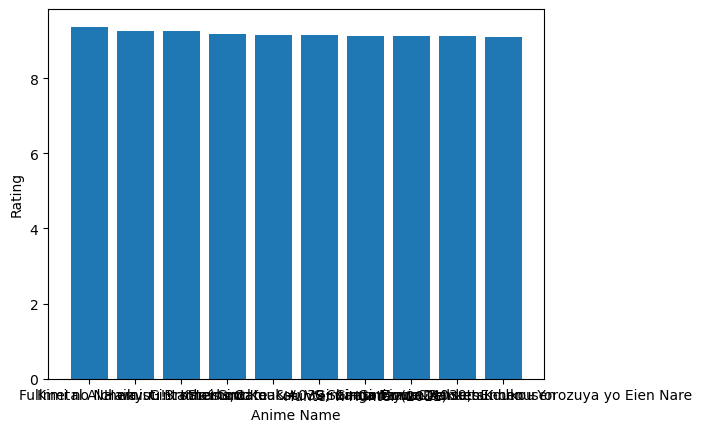

In [48]:
plt.bar(top_10['anime_title'], top_10['rating'])
plt.xlabel("Anime Name")
plt.ylabel("Rating")
plt.show()

In [49]:
#least 10 anime by user rating 

least_10 = unique_anime_ratings[['anime_title', 'rating']].sort_values(by = 'rating', ascending = True).head(10)
least_10.head(10)

,anime_title,rating
7685765,Tenkuu Danzai Skelter+Heaven,2.00
7685675,Utsu Musume Sayuri,2.14
7684543,Hametsu no Mars,2.37
7688781,Roboteuwang Sseonsyakeu,2.49
7688011,Mechano: Scientific Attack Force,2.55
7684506,Kokuhaku,2.67
7684519,Nami,2.67
7689551,Undouki Kenshin Manual Taiou Taisou,2.72
7684425,Ningen Doubutsuen,2.78
7688859,Saru Kani Gassen (Yokoku),2.84


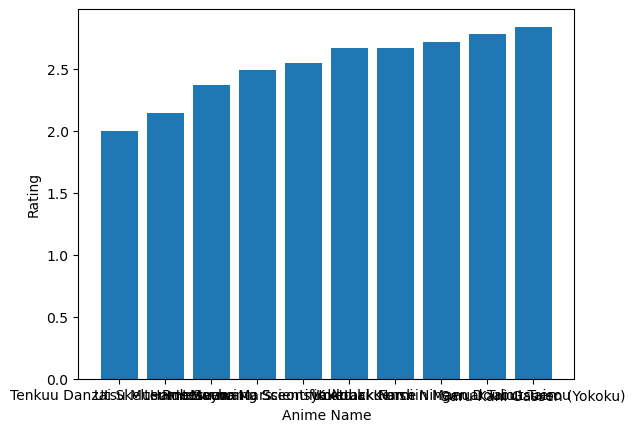

In [50]:
plt.bar(least_10['anime_title'], least_10['rating'])
plt.xlabel("Anime Name")
plt.ylabel("Rating")
plt.show()

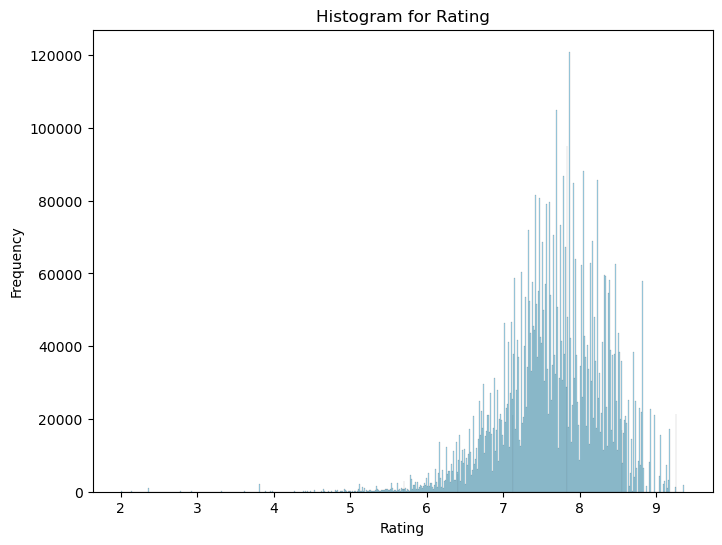

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], color='skyblue', bins=len(df['rating'].unique()))
plt.title('Histogram for Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

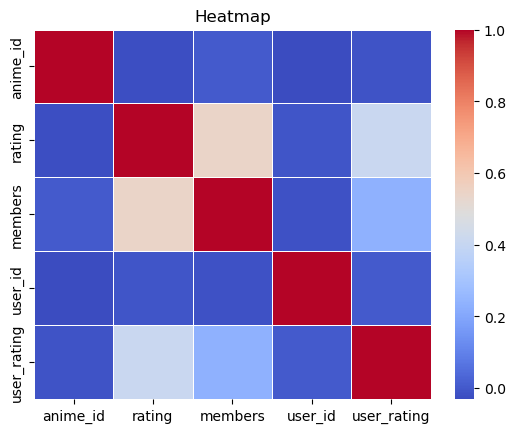

In [52]:
correlation_matrix = df.select_dtypes(exclude='O').corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Heatmap")
plt.show()

Text(0.5, 0, 'Rating')

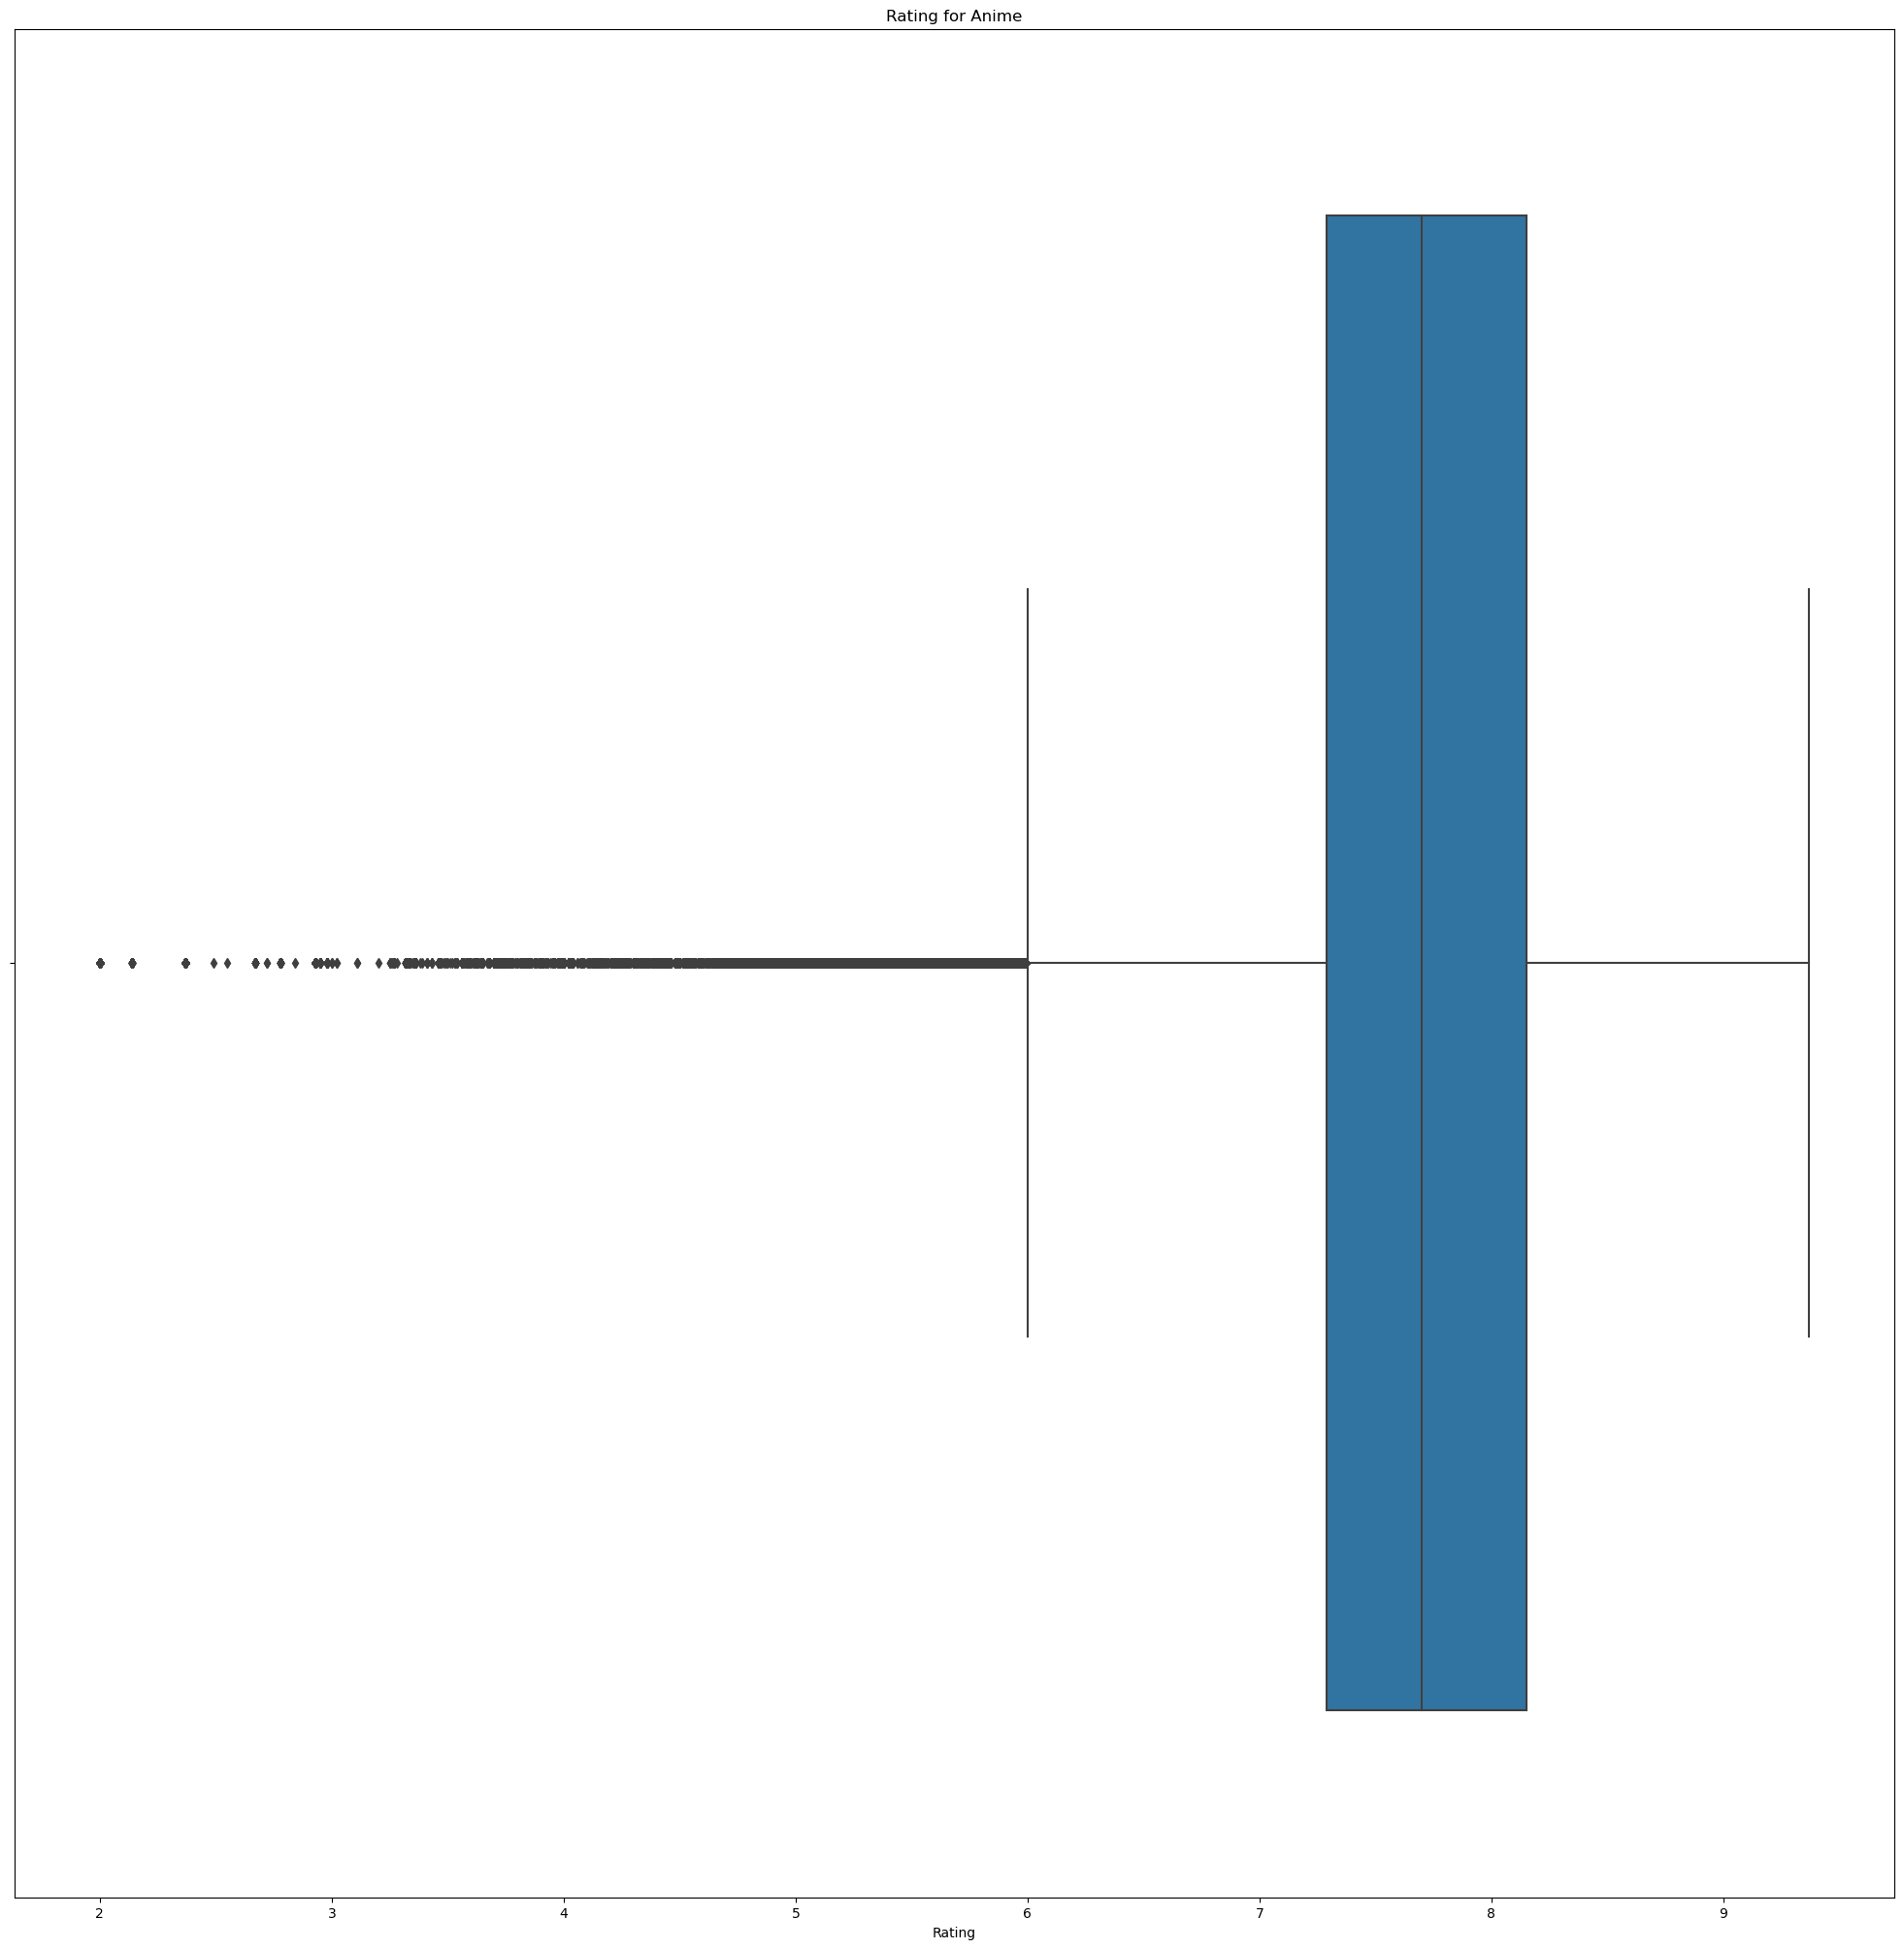

In [53]:
plt.figure(figsize=(25,25))
sns.boxplot(x=df['rating'])
plt.title('Rating for Anime')
plt.xlabel('Rating')

# Popularity Based Prediction 


In [70]:
x_data = df.groupby('anime_title').count()['user_rating'].reset_index()
x_data.rename(columns={'user_rating':'num_rating'},inplace=True)

In [76]:
avg_rating_df = df.groupby('anime_title').mean()['user_rating'].reset_index()
avg_rating_df.rename(columns={'user_rating':'avg_rating'},inplace=True)
avg_rating_df.head()

C:\Users\devil\AppData\Local\Temp\ipykernel_18856\2668435639.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = df.groupby('anime_title').mean()['user_rating'].reset_index()


,anime_title,avg_rating
0,&quot;0&quot;,4.764706
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,1.000000
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,7.343307
3,&quot;Bungaku Shoujo&quot; Memoire,7.744713
4,&quot;Bungaku Shoujo&quot; Movie,7.840154


In [77]:
popular_df = x_data.merge(avg_rating_df,on='anime_title')
popular_df.head()

,anime_title,num_rating,avg_rating
0,&quot;0&quot;,17,4.764706
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,1,1.000000
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,635,7.343307
3,&quot;Bungaku Shoujo&quot; Memoire,662,7.744713
4,&quot;Bungaku Shoujo&quot; Movie,1295,7.840154


In [82]:
top_50 = popular_df.sort_values('num_rating',ascending=False).head(50)
top_50

,anime_title,num_rating,avg_rating
1672,Death Note,34226,8.834629
8396,Sword Art Online,26310,8.140213
7868,Shingeki no Kyojin,25290,8.725741
1410,Code Geass: Hangyaku no Lelouch,24126,8.927796
360,Angel Beats!,23565,8.549714
2147,Elfen Lied,23528,8.064434
6037,Naruto,22071,7.893888
2364,Fullmetal Alchemist: Brotherhood,21494,9.322741
2363,Fullmetal Alchemist,21332,8.453356
1414,Code Geass: Hangyaku no Lelouch R2,21124,9.059837


In [85]:
y_data = top_50.sort_values('avg_rating',ascending=False)
y_data.head(50)

,anime_title,num_rating,avg_rating
2364,Fullmetal Alchemist: Brotherhood,21494,9.322741
8255,Steins;Gate,17151,9.261326
1383,Clannad: After Story,15518,9.165292
1414,Code Geass: Hangyaku no Lelouch R2,21124,9.059837
8606,Tengen Toppa Gurren Lagann,16955,8.933176
1410,Code Geass: Hangyaku no Lelouch,24126,8.927796
7656,Sen to Chihiro no Kamikakushi,19481,8.923259
1478,Cowboy Bebop,13449,8.869433
1672,Death Note,34226,8.834629
5831,Mononoke Hime,13679,8.807077


In [88]:
y_data.merge(df,on ='anime_title').drop_duplicates('anime_title')[['anime_title','genre','avg_rating','num_rating','type','episodes']]

,anime_title,genre,avg_rating,num_rating,type,episodes
0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.322741,21494,TV,64
21494,Steins;Gate,"Sci-Fi, Thriller",9.261326,17151,TV,24
38645,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",9.165292,15518,TV,24
54163,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",9.059837,21124,TV,25
75287,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",8.933176,16955,TV,27
92242,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",8.927796,24126,TV,25
116368,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",8.923259,19481,Movie,1
135849,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.869433,13449,TV,26
149298,Death Note,"Mystery, Police, Psychological, Supernatural, ...",8.834629,34226,TV,37
183524,Mononoke Hime,"Action, Adventure, Fantasy",8.807077,13679,Movie,1


# Collaborative Filtering 


In [108]:
y = df.groupby('user_id').count()['user_rating'] > 500
weebs = y[y].index

In [118]:
filtered_rating = df[df['user_id'].isin(weebs)]
filtered_rating

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
15,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,786,10.0
38,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1497,10.0
39,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1504,10.0
40,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1522,8.0
...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1.0
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4.0
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1.0
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6.0


In [124]:
x = filtered_rating.groupby('anime_title').count()['user_rating']>=100
famous_anime = x[x].index

In [125]:
famous_anime

Index(['&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi',
       '&quot;Bungaku Shoujo&quot; Memoire',
       '&quot;Bungaku Shoujo&quot; Movie', '.hack//G.U. Returner',
       '.hack//G.U. Trilogy', '.hack//Gift', '.hack//Intermezzo',
       '.hack//Liminality', '.hack//Quantum', '.hack//Roots',
       ...
       'ef: A Tale of Melodies. - Prologue', 'ef: A Tale of Memories.',
       'ef: A Tale of Memories. - Prologue', 'iDOLM@STER Xenoglossia',
       's.CRY.ed', 'xxxHOLiC', 'xxxHOLiC Kei',
       'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'xxxHOLiC Rou',
       'xxxHOLiC Shunmuki'],
      dtype='object', name='anime_title', length=2625)

In [127]:
final_rating = filtered_rating[filtered_rating['anime_title'].isin(famous_anime)]

In [128]:
final_rating.drop_duplicates()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
15,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,786,10.0
38,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1497,10.0
39,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1504,10.0
40,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1522,8.0
...,...,...,...,...,...,...,...,...,...
7813040,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,70015,6.0
7813054,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,70585,5.0
7813095,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,71790,10.0
7813096,1639,Boku no Pico,"Hentai, Yaoi",OVA,1,5.13,57355,71792,1.0


In [130]:
pt = final_rating.pivot_table(index='anime_title',columns='user_id',values='user_rating')

In [137]:
pt.fillna(0,inplace=True)
pt

user_id,226,271,294,392,446,478,661,741,771,786,...,73234,73272,73286,73340,73356,73362,73378,73395,73499,73502
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,7.0,0.0,0.0,9.0,0.0,6.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,8.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,8.0,4.0,9.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,9.0,9.0,0.0,8.0,0.0,9.0,0.0,10.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,6.0,8.0,7.0,8.0,8.0,0.0,0.0,0.0,0.0,10.0
xxxHOLiC Kei,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,10.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,10.0


In [133]:
from sklearn.metrics.pairwise import cosine_similarity 

In [141]:
pt2 = df.pivot_table(index='anime_title',columns='user_id',values='user_rating')


In [144]:
pt2.fillna(0,inplace=True)

In [145]:
similarity_score = cosine_similarity(pt)
similarity_score2 = cosine_similarity(pt2)

In [147]:
np.where(pt2.index=='Boku no Pico')

(array([968], dtype=int64),)

In [155]:
sorted(list(enumerate(similarity_score2[0])),key = lambda x:x[1],reverse=True)[1:6]

[(9430, 0.4281292603561287),
 (1957, 0.37534280725596575),
 (6524, 0.35889250524075605),
 (2128, 0.35323722836106786),
 (1619, 0.3520015713131778)]

In [161]:
def recommend(book_name):
    index = np.where(pt2.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_score2[index])),key = lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt2.index[i[0]])

In [166]:
recommend('Naruto')

Death Note
Fullmetal Alchemist
Bleach
Fullmetal Alchemist: Brotherhood
Code Geass: Hangyaku no Lelouch


In [167]:
recommend('Shingeki no Kyojin')

Sword Art Online
Tokyo Ghoul
No Game No Life
Mirai Nikki (TV)
Death Note


In [168]:
recommend('High School DxD')

High School DxD New
Date A Live
Highschool of the Dead
High School DxD BorN
Dakara Boku wa, H ga Dekinai.
